In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Read in 3 components of the seismogram

In [46]:
rad = np.genfromtxt('../Data/2002.321.full.r.asc')
tan = np.genfromtxt('../Data/2002.321.full.t.asc')
ver = np.genfromtxt('../Data/2002.321.full.z.asc')

The direct P-wave arrives between 500 and 550s, extract time information and plot three components in that time interval.

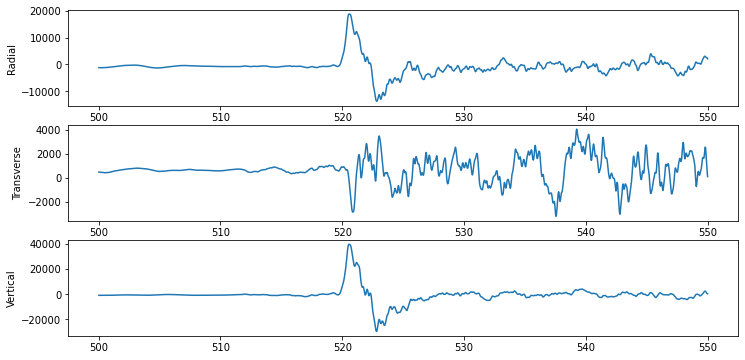

In [47]:
time = rad[:,0]
ind = (time > 500) & (time < 550)

f= plt.figure(figsize=(12,6))
f.add_subplot(311)
plt.plot(time[ind],rad[ind,1])
plt.ylabel("Radial")
f.add_subplot(312)
plt.plot(time[ind],tan[ind,1])
plt.ylabel("Transverse")
f.add_subplot(313)
plt.plot(time[ind],ver[ind,1])
plt.ylabel("Vertical")
#plt.savefig('seismo.pdf')
plt.show()

(-4000.0, 4000.0)

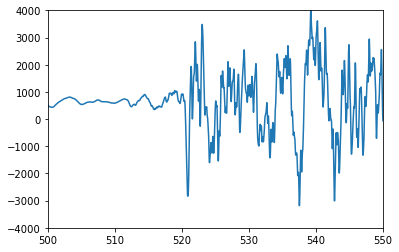

In [48]:
# Double check plot
plt.plot(time, tan[:,1])
plt.xlim(500,550)
plt.ylim(-4000,4000)

Write components into a single matrix and perform SVD

In [53]:
X = np.vstack([rad[ind,1],tan[ind,1],ver[ind,1]]).T
X_centered = X - X.mean(axis=0)
# Why centering?
# Individual components have zero mean
# Caclulate mean when reading in components and subtract seperately or done here 
# (axix = 0 --> mean along columns of matrix)
print(X.mean(axis=0))

U, s, Vt = np.linalg.svd(X_centered)

[-817.21407588  663.50546523 -718.15007504]


Use sklearn PCA class to do the same thing and compare some outputs

In [51]:
p = PCA() 
# Why fit on centred and not on X? Because fit removes mean by default
p.fit(X_centered)
#p.fit(X) 
# latter: mean removal automatically 

print("p.explained_variance_ratio_ = {}\n".format(p.explained_variance_ratio_))
print("s**2/np.sum(s**2) = {}\n".format(s**2/np.sum(s**2))) # raw equation from Slides based on square of sigma values

print("Vt = {}\n".format(Vt)) # from above
print("p.components_ = {}\n".format(p.components_))

p.explained_variance_ratio_ = [0.95865971 0.02819811 0.01314218]

s**2/np.sum(s**2) = [0.95865971 0.02819811 0.01314218]

Vt = [[ 0.43237846 -0.01509573  0.90156585]
 [-0.65864198  0.67758188  0.32722091]
 [-0.61582433 -0.7352924   0.28302913]]

p.components_ = [[ 0.43237846 -0.01509573  0.90156585]
 [ 0.65864198 -0.67758188 -0.32722091]
 [-0.61582433 -0.7352924   0.28302913]]



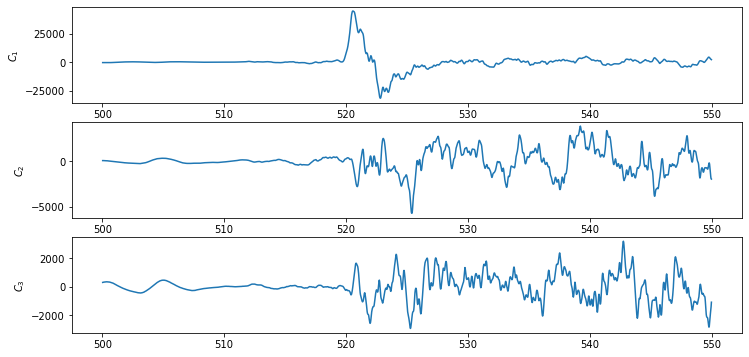

In [52]:
recov = X.dot(Vt.T[:,0])
f=plt.figure(figsize=(12,6))
f.add_subplot(311)
plt.plot(time[ind],X_centered.dot(Vt.T[:,0]))
plt.ylabel(r"$C_1$")
f.add_subplot(312)
plt.plot(time[ind],X_centered.dot(Vt.T[:,1]))
plt.ylabel(r"$C_2$")
f.add_subplot(313)
plt.plot(time[ind],X_centered.dot(Vt.T[:,2]))
plt.ylabel(r"$C_3$")
#plt.savefig('seismo_pca.pdf')
plt.show()

**After rotatation 95 % of signal are in C1.**

Variability means how the different amplitudes vary, but in moment tensor example PCA does not know anything about colors (just sorts by variability).